# Solving the clustering Issue

In [39]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
df = pd.read_csv('customer_segmentation.csv')

In [41]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [42]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [43]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


## Feature Selection

*Interesting*: Birth, Education, Martial Status, Income, MntWines

*Medicore*: ID, Kidhome, Teenhome, Dt_Customer, Recency, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePruchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, Accepted Cmp5, Accepted Cmp1, Accepted Cmp2

*Drop*: MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, Complain, Z_CostContact, Z_Revenue, Response

In [44]:
drop_col = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(columns=drop_col, inplace=True)

/Users/denco_23/Documents/AI/Projects/Clustering/Customer_Segmentation/venv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/Users/denco_23/Documents/AI/Projects/Clustering/Customer_Segmentation/venv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/Users/denco_23/Documents/AI/Projects/Clustering/Customer_Segmentation/venv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



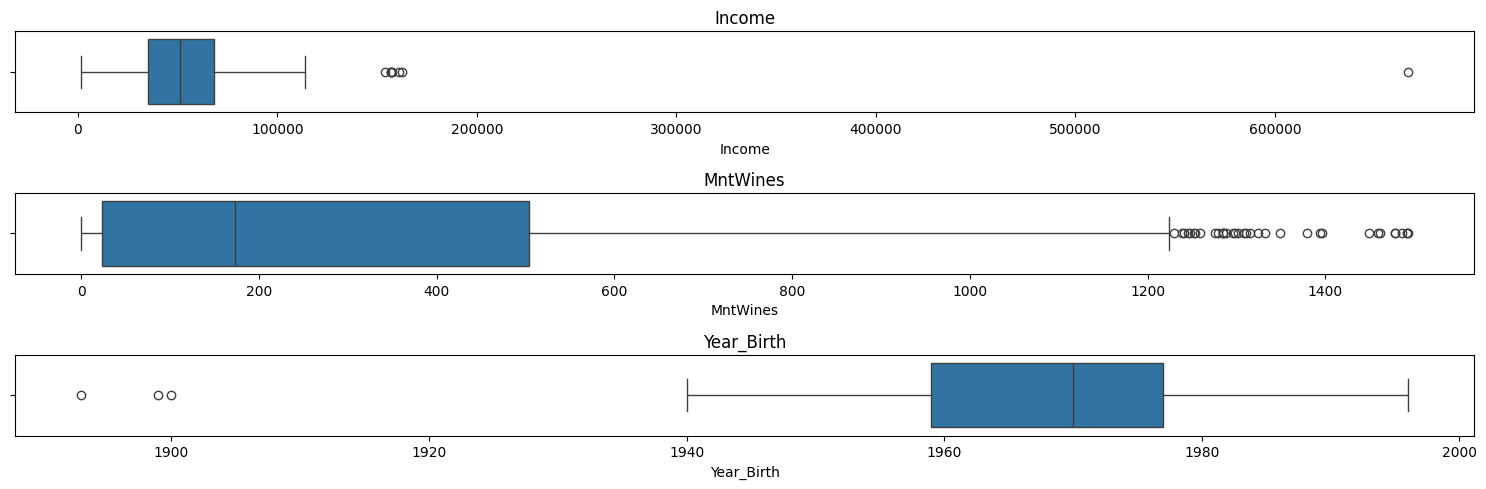

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Income', 'MntWines', and 'Recency'
# Replace 'Income', 'MntWines', and 'Recency' with your actual column names

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 5))

# Boxplot for 'Income'
sns.boxplot(x='Income', data=df, ax=axes[0])
axes[0].set_title('Income')

# Boxplot for 'MntWines'
sns.boxplot(x='MntWines', data=df, ax=axes[1])
axes[1].set_title('MntWines')

# Boxplot for 'Recency'
sns.boxplot(x='Year_Birth', data=df, ax=axes[2])
axes[2].set_title('Year_Birth')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Remarks concering the distribution
- 1 data point in the "Income" column is a significant outlier. Which needs to be to be dropped to improve the model's performance
- 3 data points for the "Year_Birth" attribute need dropping. They potentially are caused by incorrect data input. Dropping them improves the results of the created clusters.

In [46]:
## Drop row of higest Income value 
# Find the index of the highest value in 'Income'
highest_income_index = df['Income'].idxmax()

# Drop the row with the highest value in 'Income'
df = df.drop(highest_income_index)


## Drop 3 rows of lowest Year_Birth column 
# Find the three lowest values in 'Year_Birth'
lowest_years = df['Year_Birth'].nsmallest(3).index

# Drop the rows with the three lowest values
df = df.drop(lowest_years)

In [47]:
# drop null values of "Income" column
df = df.dropna(subset=["Income"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  NumDealsPurchases    2212 non-null   int64  
 11  NumWebPurchases      2212 non-null   int64  
 12  NumCatalogPurchases  2212 non-null   int64  
 13  NumStorePurchases    2212 non-null   int64  
 14  NumWebVisitsMonth    2212 non-null   int64  
 15  AcceptedCmp3         2212 non-null   int64 

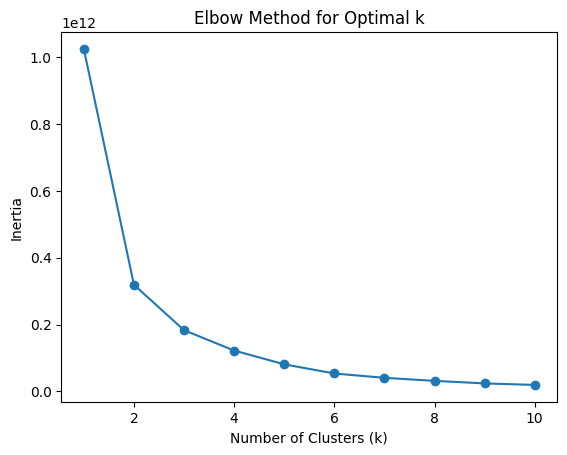

In [49]:
# Elbow method based on the inertia scores
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [50]:
from sklearn.cluster import KMeans
# Assuming 'selected_features' is a list of feature columns
selected_columns = ["Income", "MntWines", "Year_Birth", "Recency", "NumDealsPurchases" , "NumWebPurchases" ]
X = df[selected_columns]

# Specify the number of clusters (k)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
df['cluster'] = kmeans.fit_predict(X)
df.cluster.value_counts

<bound method IndexOpsMixin.value_counts of 0       2
1       3
2       0
3       1
4       2
       ..
2235    2
2236    2
2237    2
2238    2
2239    2
Name: cluster, Length: 2212, dtype: int32>

In [51]:
# Silhoutte Score: measures how well the clusters are separarted (-1 to 1)
# Inertia: measures how far points are away from the centroids
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
print("Inertia:", kmeans.inertia_/1000000)

Silhouette Score: 0.5385024939417282
Inertia: 80934.96762656473


### based on the visual depicted above, k is set to 5

In [52]:
# Conduct a PCA analysis to reduce the dimensionality to 3-D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_df = pca.fit_transform(X)

component_loadings = pd.DataFrame(pca.components_, columns=X.columns)
print(component_loadings)

"""# Get the names of the PCA
component_names = [f'Principal Component {i+1}' for i in range(pca.n_components_)]

# Create a DataFrame with the reduced data and component names
reduced_df = pd.DataFrame(reduced_df, columns=component_names)

# Access the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print the names of the principal components and their explained variance ratios
for i, component in enumerate(component_names):
    print(f"{component}: {explained_variance_ratios[i]:.2%}")"""

     Income  MntWines  Year_Birth   Recency  NumDealsPurchases  \
0  0.999942  0.010785   -0.000109  0.000011          -0.000010   
1  0.010785 -0.999932    0.001782 -0.001736          -0.000906   
2  0.000007 -0.001742   -0.006497  0.999976           0.000130   

   NumWebPurchases  
0         0.000059  
1        -0.003669  
2        -0.001334  


'# Get the names of the PCA\ncomponent_names = [f\'Principal Component {i+1}\' for i in range(pca.n_components_)]\n\n# Create a DataFrame with the reduced data and component names\nreduced_df = pd.DataFrame(reduced_df, columns=component_names)\n\n# Access the explained variance ratios\nexplained_variance_ratios = pca.explained_variance_ratio_\n\n# Print the names of the principal components and their explained variance ratios\nfor i, component in enumerate(component_names):\n    print(f"{component}: {explained_variance_ratios[i]:.2%}")'

In [53]:
# Visualize the data after reducing the dataframe
reduced_df
# Assuming reduced_data is a NumPy array resulting from PCA
# Replace 'Principal Component 1', 'Principal Component 2', 'Principal Component 3' with your actual column names
columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
reduced_df = pd.DataFrame(reduced_df, columns=columns)

# Rename columns to 'PCA1', 'PCA2', 'PCA3'
reduced_df.columns = ['PCA1', 'PCA2', 'PCA3']
reduced_df['Cluster'] = kmeans.labels_

# Now, reduced_df columns are renamed
print(reduced_df)

              PCA1        PCA2       PCA3  Cluster
0      6182.387477 -263.099091   8.524169        2
1     -5617.656475  233.715789 -10.447270        3
2     19654.348518   91.286223 -23.062680        0
3    -25314.514085   21.343287 -22.790087        1
4      6332.393512  200.530458  45.177838        2
...            ...         ...        ...      ...
2207   9268.004961 -303.786393  -3.647931        2
2208  12055.577143   29.238207   7.039043        2
2209   5028.396410 -548.549362  40.890877        2
2210  17286.508479   63.769097 -41.022121        2
2211    907.751415  231.081252  -8.528413        2

[2212 rows x 4 columns]


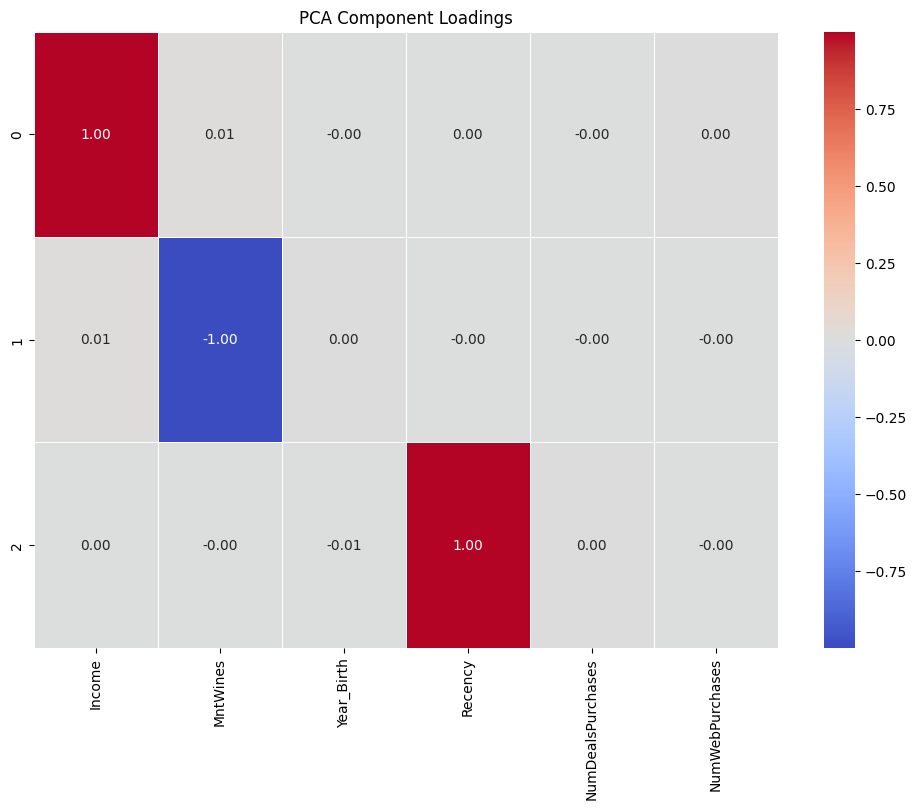

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(component_loadings, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('PCA Component Loadings')
plt.show()

In [55]:
import nbformat
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure()

for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Income'],
        y=cluster_data['MntWines'],
        z=cluster_data['Recency'],
        mode='markers',
        marker=dict(size=5),
        name=f'cluster {cluster}'
    ))

fig.update_layout(scene=dict(
                    xaxis_title='Income',
                    yaxis_title='MntWines',
                    zaxis_title='Recency'),
                    title='Interactive 3D Scatter Plot 1')


fig.update_layout(xaxis=dict(scaleanchor='y', scaleratio=2))

# Show the plot
fig.show()

### Cluster 4: is not of high signficance for a Marketing campaign
### Cluster 0: is a crucial cluster as is contains the most signficant wine consumption incl. 
### Cluster 2: this one is the second must promising cluster for the marketing campaign with respect to its financial importance

In [56]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure()

for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Income'],
        y=cluster_data['Teenhome'],
        z=cluster_data['Recency'],
        mode='markers',
        marker=dict(size=5),
        name=f'cluster {cluster}'
    ))

fig.update_layout(scene=dict(
                    xaxis_title='Income',
                    yaxis_title='Teenhome',
                    zaxis_title='Recency'),
                    title='Interactive 3D Scatter Plot incl. "Teenhome"')


fig.update_layout(xaxis=dict(scaleanchor='y', scaleratio=2))

# Show the plot
fig.show()

In [57]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure()

for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Income'],
        y=cluster_data['Kidhome'],
        z=cluster_data['Recency'],
        mode='markers',
        marker=dict(size=5),
        name=f'cluster {cluster}'
    ))

fig.update_layout(scene=dict(
                    xaxis_title='Income',
                    yaxis_title='Kidhome',
                    zaxis_title='Recency'),
                    title='Interactive 3D Scatter Plot incl. "Kidhome"')


fig.update_layout(xaxis=dict(scaleanchor='y', scaleratio=2))

# Show the plot
fig.show()

### Considering the 5 clusters in the two preceeding scatterplots, the data indicates that the majority of wine-consuming customers do not have a child or a teen at home, followed by those having one child or teen at home.